In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import os
import tensorflow.compat.v1 as tf
tf.__version__

'2.3.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
def search_dir(type="normal", num=6):
  #Helper function to scan contents of directory
  counter=0

  for file in os.listdir(train_dir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpg"):
          print(file)

      counter += 1

In [ ]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [ ]:
def plot_images(type="normal", num=6):
  #Helper function to plot images
  counter=0
  fig = plt.figure(figsize=(10, 8))
  

  for file in os.listdir(train_dir + type.upper()):

      if file.endswith(".jpg"):
          if counter == num:
              break

          img = mpimg.imread(train_dir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

In [ ]:
#Point to the relevant directories
train_dir = "/content/drive/My Drive/Insight/Test code/Data/Training Ready/train/"
val_dir   = "/content/drive/My Drive/Insight/Test code/Data/Training Ready/val/" #directories for training

test_dir  = "/content/drive/My Drive/Insight/Test code/Data/Training Ready/test/"

In [ ]:
search_dir(type="NORMAL", num=10)
search_dir(type="THC", num=10)

merged21.jpg
merged20.jpg
merged23.jpg
merged36.jpg
merged37.jpg
merged27.jpg
merged53.jpg
merged54.jpg
merged62.jpg
merged46.jpg
merged26.jpg
merged24.jpg
merged22.jpg
merged21.jpg
merged23.jpg
merged20.jpg
merged25.jpg
merged55.jpg
merged35.jpg
merged77.jpg


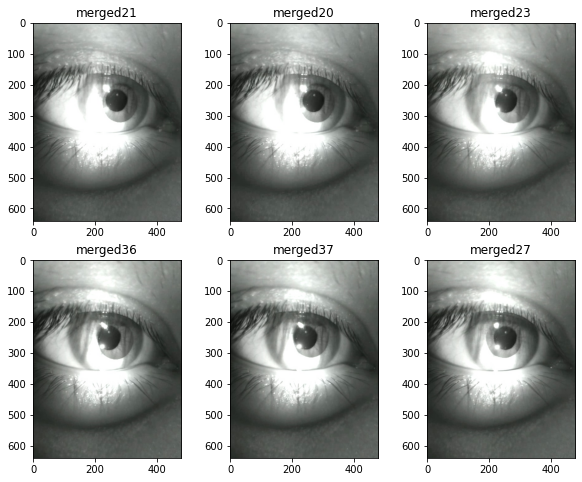

In [ ]:
plot_images(type="NORMAL", num=6)

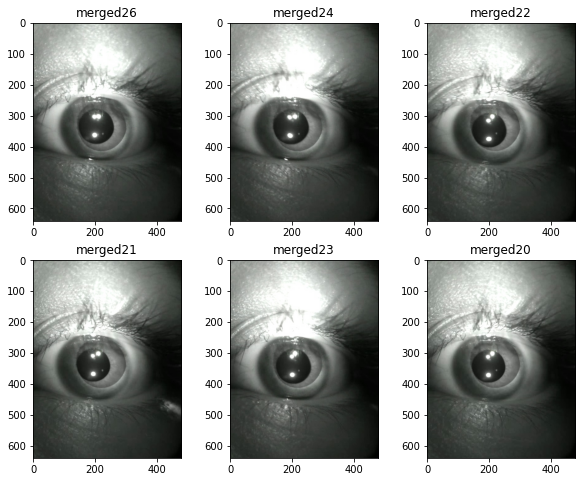

In [ ]:
plot_images(type="THC", num=6)

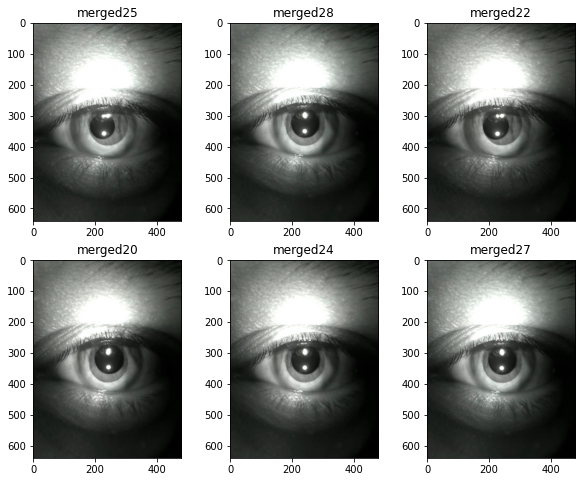

In [ ]:
plot_images(type="METH", num=6)

In [ ]:
import numpy as np
from keras.applications.ResNet50 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing import image

In [ ]:
pre_model = InceptionV2(weights='imagenet')

NameError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=144


#Create training data generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) #Create image generator in the abstract 

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, #directory that contains training data
        target_size=(150, 150), #what size image we want
        batch_size=batch_size, #how many files to read in at a time
        class_mode="categorical") 

Found 240 images belonging to 3 classes.


In [ ]:
#Create validation data generator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode="categorical")

Found 31 images belonging to 3 classes.


In [ ]:
import keras
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False)

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
#x = keras.layers.Dropout(0.5)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(3, activation='softmax')(x)


for layer in base_model.layers:
  layer.trainable = False  # Freeze the layers not to train
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) #create final model

adam = keras.optimizers.Adam(lr=0.00001)


In [ ]:
final_model.compile(loss ="categorical_crossentropy", #another term for log loss
                    optimizer = adam, 
                    metrics=["accuracy"])


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/Colab Notebooks/Weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
fit_history = final_model.fit_generator(
        train_generator, #train data generator 
        steps_per_epoch=len(train_generator),
        epochs=25,
        validation_data=val_generator, #validation data generator 
        validation_steps=len(val_generator))

Epoch 1/25
2/2 [==============================] - 1s 644ms/step - loss: 0.1039 - accuracy: 0.9958 - val_loss: 0.7467 - val_accuracy: 0.6452
Epoch 2/25
2/2 [==============================] - 2s 851ms/step - loss: 0.1031 - accuracy: 0.9958 - val_loss: 0.7417 - val_accuracy: 0.6452
Epoch 3/25
2/2 [==============================] - 1s 570ms/step - loss: 0.0967 - accuracy: 0.9958 - val_loss: 0.7368 - val_accuracy: 0.6452
Epoch 4/25
2/2 [==============================] - 1s 562ms/step - loss: 0.0998 - accuracy: 0.9958 - val_loss: 0.7320 - val_accuracy: 0.6452
Epoch 5/25
2/2 [==============================] - 1s 573ms/step - loss: 0.0881 - accuracy: 1.0000 - val_loss: 0.7271 - val_accuracy: 0.6452
Epoch 6/25
2/2 [==============================] - 2s 854ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 0.7222 - val_accuracy: 0.6452
Epoch 7/25
2/2 [==============================] - 1s 562ms/step - loss: 0.0981 - accuracy: 0.9958 - val_loss: 0.7173 - val_accuracy: 0.6774
Epoch 8/25
2/2 [====

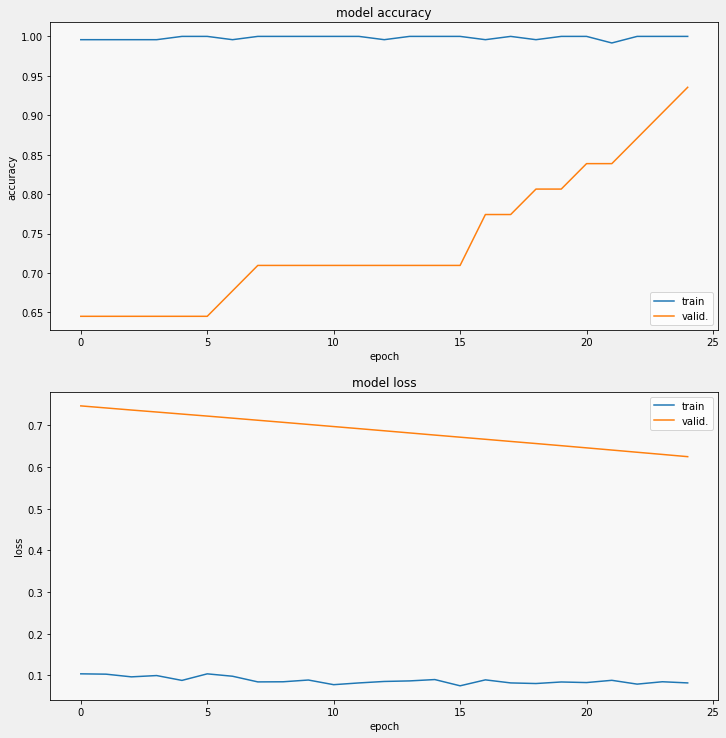

In [ ]:
display_training_curves(fit_history.history['accuracy'], fit_history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [ ]:
final_model.save("val_accuracy_93.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import loadtxt
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Insight/Models/val_accuracy_93.h5")
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 